In [1]:
using DataFrames, CSV
data = CSV.read("data/sensor_data_200.txt", DataFrame, header=["date", "time", "ir", "lidar"], delim=' ')
print(data)

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = (::getfield(CSV, Symbol("##30#38")))(::Type) at Source.jl:172
└ @ CSV /home/szmlb/.julia/packages/CSV/tT4Xy/src/Source.jl:172
┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = #Source#22(::String, ::CSV.Options{Nothing}, ::Array{String,1}, ::Int64, ::Array{Type,1}, ::Symbol, ::Nothing, ::Bool, ::Nothing, ::Symbol, ::Int64, ::Int64, ::Int64, ::Bool, ::Type) at Source.jl:182
└ @ CSV /home/szmlb/.julia/packages/CSV/tT4Xy/src/Source.jl:182
┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = #Source#22(::String, ::CSV.Options{Nothing}, ::Array{String,1}, ::Int64, ::Array{Type,1}, ::Symbol, ::Nothing, ::Bool, ::Nothing, ::Symbol, ::Int64, ::Int64, ::Int64, ::Bool, ::Type) at Source.jl:210
└ @ CSV /home/szmlb/.julia/packages/CSV/tT4Xy/src/Source.jl:210
┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = #Source#22(::String, ::CSV.Options{Nothing}, ::Array{S

58988×4 DataFrame
│ Row   │ date     │ time   │ ir  │ lidar │
├───────┼──────────┼────────┼─────┼───────┤
│ 1     │ 20180122 │ 95819  │ 305 │ 214   │
│ 2     │ 20180122 │ 95822  │ 299 │ 211   │
│ 3     │ 20180122 │ 95826  │ 292 │ 199   │
│ 4     │ 20180122 │ 95829  │ 321 │ 208   │
│ 5     │ 20180122 │ 95832  │ 298 │ 212   │
│ 6     │ 20180122 │ 95835  │ 327 │ 212   │
│ 7     │ 20180122 │ 95838  │ 293 │ 215   │
│ 8     │ 20180122 │ 95840  │ 309 │ 218   │
│ 9     │ 20180122 │ 95843  │ 323 │ 208   │
│ 10    │ 20180122 │ 95846  │ 292 │ 217   │
│ 11    │ 20180122 │ 95850  │ 294 │ 215   │
⋮
│ 58977 │ 20180124 │ 120002 │ 302 │ 209   │
│ 58978 │ 20180124 │ 120005 │ 303 │ 207   │
│ 58979 │ 20180124 │ 120009 │ 310 │ 206   │
│ 58980 │ 20180124 │ 120012 │ 330 │ 208   │
│ 58981 │ 20180124 │ 120015 │ 305 │ 205   │
│ 58982 │ 20180124 │ 120018 │ 301 │ 202   │
│ 58983 │ 20180124 │ 120021 │ 320 │ 206   │
│ 58984 │ 20180124 │ 120023 │ 313 │ 208   │
│ 58985 │ 20180124 │ 120026 │ 297 │ 200   │
│ 58986 │ 20

In [2]:
data.lidar[1:5]

5-element Array{Union{Missing, Int64},1}:
 214
 211
 199
 208
 212

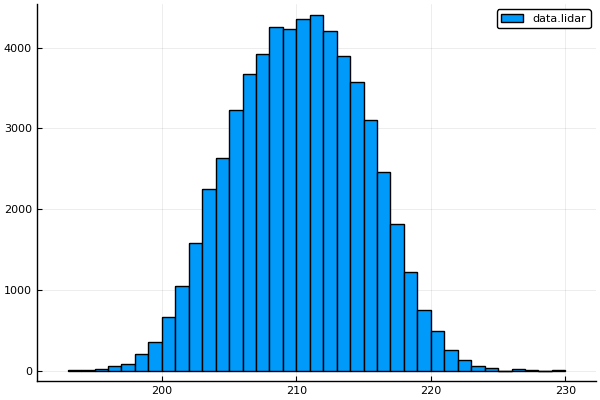

In [3]:
using Plots
pyplot()
histogram(data.lidar, bin=maximum(data.lidar)-minimum(data.lidar), label="data.lidar")

In [4]:
using Statistics
mean1=sum(data.lidar)/length(data.lidar)
mean2=mean(data.lidar)
print(mean1, " ", mean2)

209.73713297619855 209.73713297619855

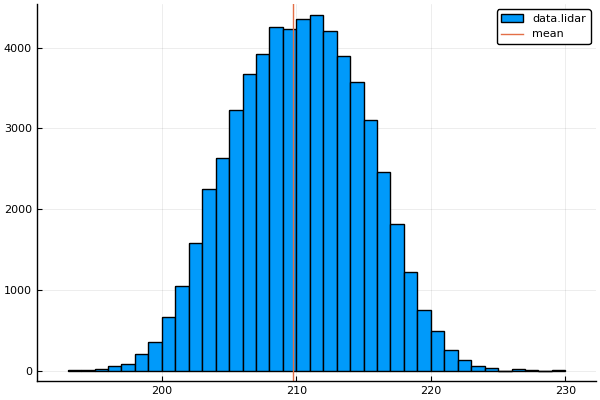

In [5]:
histogram(data.lidar, bin=maximum(data.lidar)-minimum(data.lidar), label="data.lidar");
vline!([mean1], label="mean") # with hold

In [6]:
# 定義から計算
zs = data.lidar
mean_val = sum(zs)/length(zs)
diff_square = (zs .- mean_val).^2 # diff_square = [(z - mean_val)^2 for z in zs]

sampling_var = sum(diff_square)/length(zs)
unbiased_var = sum(diff_square)/(length(zs)-1)

println(sampling_var)
println(unbiased_var)

# Statisticsを使用
statistics_sampling_var = var(data.lidar, corrected=false)
statistics_default_var = var(data.lidar)

println(statistics_sampling_var)
println(statistics_default_var)

23.407709770274206
23.40810659855451
23.407709770274234
23.40810659855454


In [7]:
#定義から計算
stddev1 = sqrt(sampling_var)
stddev2 = sqrt(unbiased_var)

#Statisticsを使用
statistics_stddev = std(data.lidar)

println(stddev1)
println(stddev2)
println(statistics_stddev)

4.838151482774615
4.83819249292073
4.838192492920733


In [80]:
using StatsBase
freqs = DataFrame(countmap(data.lidar))
print(freqs[1, :])

1×35 DataFrame. Omitted printing of 24 columns
│ Row │ 193 │ 194 │ 195 │ 196 │ 197 │ 198 │ 199 │ 200 │ 201  │ 202  │ 203  │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│ 1   │ 4   │ 10  │ 13  │ 59  │ 84  │ 205 │ 353 │ 668 │ 1053 │ 1584 │ 2252 │